Using a gaussian mixture model, the goal is to try and better separate the classes that exist between engagements, and use this as the initial model to fit on.

This results in a new column which is loaded into a new dataset, called training_setv2.csv

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('coolwarm')
%matplotlib inline

/Users/noahkasmanoff/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
instas = pd.read_csv('Business Analytics/training_set.csv',encoding = 'unicode_escape')

First, let's visualize the distribution of engagements, and from there determine how many distributions exist. 

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


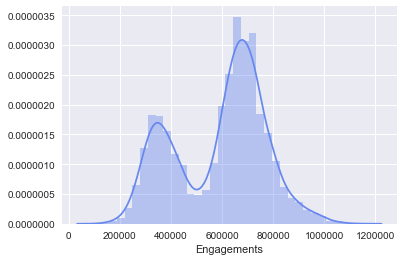

In [3]:
sns.distplot(instas['Engagements'])

This is clearly an (imbalanced) bimodal distribution. Now we'll use a gaussian mixture model https://brilliant.org/wiki/gaussian-mixture-model/ to identify these clusters. 

In [4]:
#now use Sklearn's package to fit and lable. 
from sklearn.mixture import GMM
gmm = GMM(n_components=2).fit(instas['Engagements'].values.reshape(-1,1))
labels = gmm.predict(instas['Engagements'].values.reshape(-1,1))
instas['cluster'] = labels

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packa

cluster
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Engagements, dtype: object

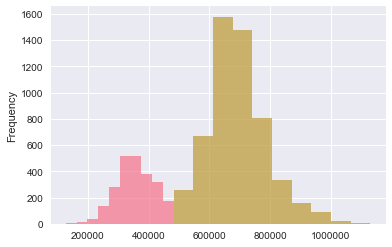

In [5]:
sns.set_palette('husl')
instas.groupby('cluster')['Engagements'].plot(kind='hist',alpha=.7)

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


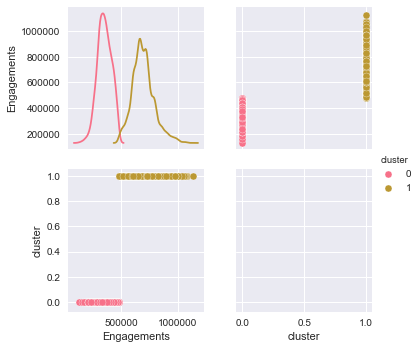

In [6]:
sns.pairplot(instas[['Engagements','cluster']],hue='cluster',diag_kind='kde')

In [7]:
instas.to_csv('Business Analytics/training_setv2.csv',index=False)

In [8]:
instas.groupby('cluster').describe()

Engagements                                                   \
              count           mean           std       min       25%   
cluster                                                                
0            2365.0  355426.363636  61360.260490  127816.0  313189.0   
1            5401.0  696041.225329  96050.695717  482469.0  635187.0   

                                       Followers at Posting                \
              50%       75%        max                count          mean   
cluster                                                                     
0        353207.0  400983.0   482231.0               2365.0  3.062033e+07   
1        687089.0  745585.0  1129585.0               5401.0  3.034335e+07   

                                                                       \
                  std         min         25%         50%         75%   
cluster                                                                 
0        3.717250e+06  24875542.0  27320429.0  30023759.0  34300664.0   
1        3.759993e+06  24875542.0  26847930.0  30047470.0  33785524.0   

                     
                max  
cluster              
0        36955156.0  
1        36984682.0

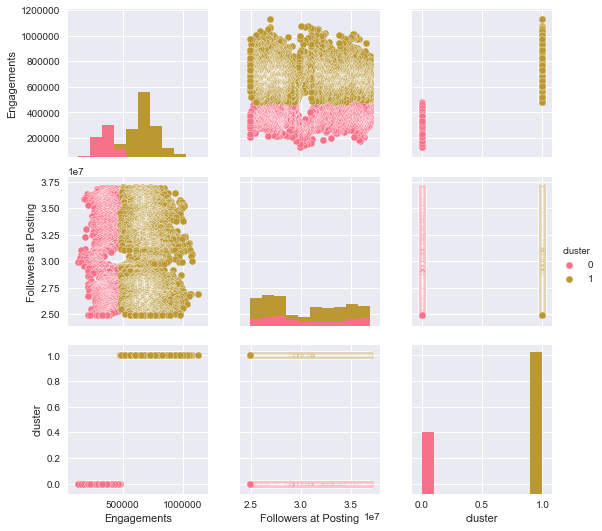

In [9]:
sns.pairplot(instas,hue='cluster')

Now everything done in Explore Business Training Data Set will get explored separately, and from that classified rather than regressed. 